## Sub cloning by restriction digestion and ligation: The construction of the YEp24PGK_XK vector

The objective of this example is to document and simulate a cut and paste cloning from the literature using pydna.
The example is the construction of the vector YEp24PGK_XK which is described on page 4250 in the publication below:

In [6]:
from IPython.display import HTML
HTML('<iframe src=http://www.ncbi.nlm.nih.gov/pmc/articles/PMC93154 width=100% height=400></iframe>')

In [7]:
import pydna

### Cloning strategy

1. the [XKS1 gene](http://www.yeastgenome.org/locus/S000003426/overview) from _Saccharomyces cerevisiae_ is amplified by PCR using two primers called primer1 and primer3. The primers has tails which add restriction sites for BamHI to the ends of the PCR product. The sequences of both primers are available in the publication. 

2. The YEp24PGK plasmid is linearized with the restriction endonuclease [BglII](http://rebase.neb.com/rebase/enz/BglII.html).

3. PCR product is digested with the restriction endonuclease [BamHI](http://rebase.neb.com/rebase/enz/BamHI.html).

4. The two molecules are ligated together to form a circular product.

The figure below shows an image outlining the strategy.

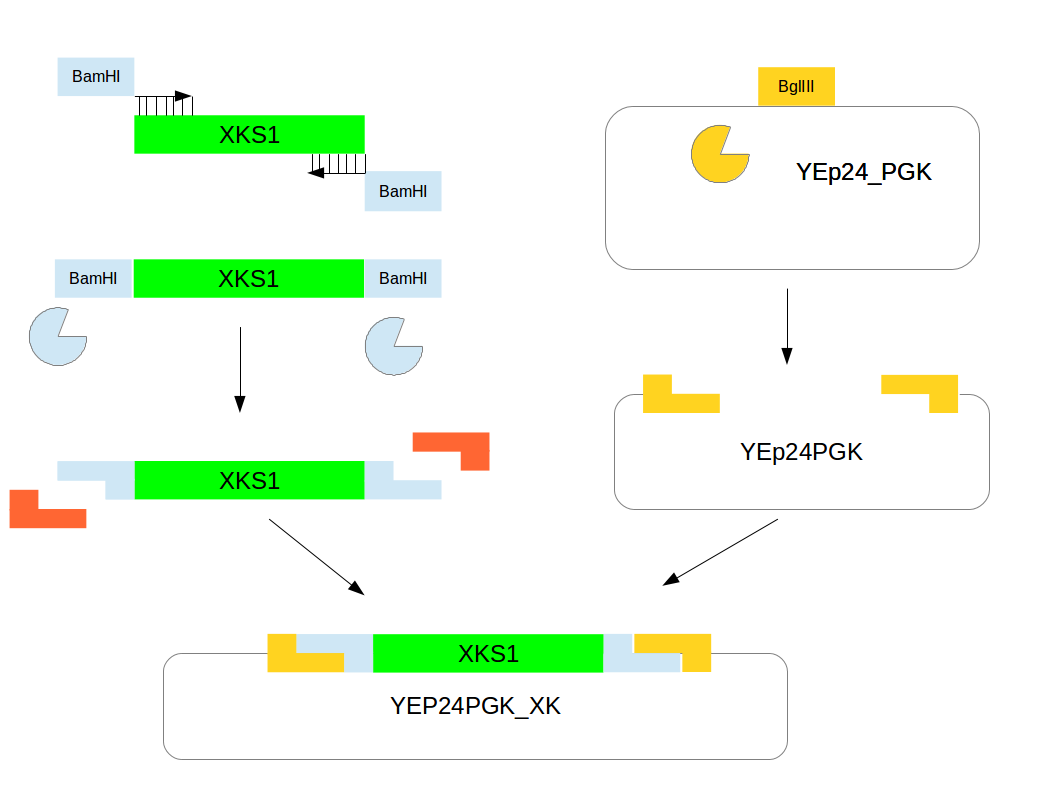

In [8]:
from IPython.core.display import Image
Image('figure1.png',width=600)

The p1 and p3 primers sequences were given in Johansson et al. The primer sequences are read into [BioPython](http://biopython.org/) [SeqRecord](http://biopython.org/wiki/SeqRecord) objects. Primers are single stranded DNA molecules, so SeqRecords are adequate for describing them.

In [9]:
p1, p3 = pydna.parse_primers('''
>primer1
GCGGATCCTCTAGAATGGTTTGTTCAGTAATTCAG

>primer3
AGATCTGGATCCTTAGATGAGAGTCTTTTCCAG
''')

The XKS1 gene sequence is dowloaded from [genbank](https://www.ncbi.nlm.nih.gov/nuccore/NC_001139.9?from=886073&to=887875&report=genbank&strand=true) like so:
    
1. Go to the [SGD page](http://www.yeastgenome.org/locus/S000003426/overview) of the XKS1 gene 
2. Entrez Gene link at the bottom of the page goes to the Genbank site for the gene
3. Go to the NCBI Reference Sequences (RefSeq) section and click on the Genbank link
4. The third line of the genbank file contains the accession entry: `ACCESSION   NC_001139 REGION: complement(886073..887875)`
5. Copy and paste the text `NC_001139 REGION: complement(886073..887875)` as the argument for the pydna.Genbank class below.

This is but one of many ways to establish sequences in pydna.

In [10]:
gb = pydna.Genbank("bjornjobb@gmail.com")
xks1 = gb.nucleotide("NC_001139 REGION: complement(886073..887875)")

The XKS1 gene has the expected size.

In [11]:
xks1

Dseqrecord(-1803)

The sequence starts with an `ATG` start codon and ends with a `TAA` stop codon.

In [12]:
xks1.seq

Dseq(-1803)
ATGT..CTAA
TACA..GATT

The convenience methods isorf can tell if the sequence is an open reading frame or not.

In [13]:
xks1.isorf()

True

The PCR product sequence is simulated from the primers and the template sequence using the pydna.pcr function. The pydna. Amplicon class offer greater control over the pcr parameters, but this is not needed here.

In [14]:
PCR_prod = pydna.pcr(p1, p3, xks1)

```
Amplicon(1829)```

We import restiction enzymes [BamHI](http://rebase.neb.com/rebase/enz/BamHI.html) and [BglII](http://rebase.neb.com/rebase/enz/BglII.html) from BioPython.

In [15]:
from Bio.Restriction import BamHI, BglII

Digesting the PCR product yield three fragments, two short stuffer fragments and the insert that we would like to clone. 

In [16]:
stuffer1, insert, stuffer2 = PCR_prod.cut(BamHI)

The insert has the expected sticky ends.

In [17]:
insert.seq

Dseq(-1819)
GATCCTCT..TAAG    
    GAGA..ATTCCTAG

The YEp24PGK vector is available from [Genbank](https://www.ncbi.nlm.nih.gov/nuccore/KC562906).

In [18]:
YEp24PGK = gb.nucleotide("KC562906")

The plasmid has the expected size (see Genbank link above).

In [19]:
YEp24PGK

Dseqrecord(o9637)

The YEp24PGK is linearized with the BglII enzyme. This method will make sure that the molecule is linearized i.e. the enzyme only cuts in one place.

In [20]:
YEp24PGK_BglII = YEp24PGK.linearize(BglII)

The linear vector has the expected size and structure.

In [21]:
YEp24PGK_BglII

Dseqrecord(-9641)

The two fragments are ligated together and looped, which means that the far ends of both molecules ligate to form a circular product.

In [22]:
YEp24PGK_XK = ( YEp24PGK_BglII + insert ).looped() 

The resulting molecule i circular and has the expected size, 11452 bp.

In [23]:
YEp24PGK_XK

Dseqrecord(o11452)

In [24]:
YEp24PGK_XK.write("YEp24PGK_XK.txt")